# Pengambilan URL Gambar

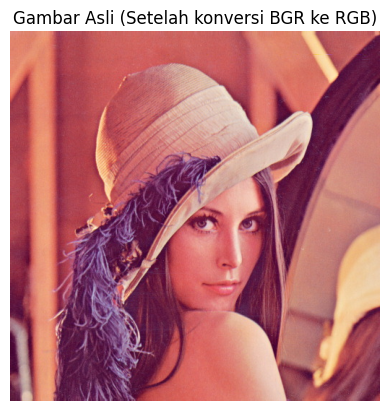

Gambar berhasil dimuat dan ditampilkan.


In [1]:
import cv2
import matplotlib.pyplot as plt
import urllib.request
import numpy as np

# URL gambar baru yang lebih stabil
# Gambar ini adalah foto anjing dari Pexels, di-host di GitHub untuk keandalan.
url = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg'
urllib.request.urlretrieve(url, 'lena.jpg')

# Membaca gambar dengan OpenCV
# Pastikan file gambar "lena.jpg" sudah terunduh
image = cv2.imread('lena.jpg')

# Mengecek apakah gambar berhasil dimuat
if image is None:
    print("Error: Gagal memuat gambar. Pastikan URL sudah benar dan file terunduh.")
else:
    # OpenCV membaca gambar dalam format BGR (Blue, Green, Red).
    # Untuk menampilkannya dengan Matplotlib, kita perlu mengubahnya ke RGB.
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Tampilkan gambar dengan Matplotlib
    plt.imshow(image_rgb)
    plt.title('Gambar Asli (Setelah konversi BGR ke RGB)')
    plt.axis('off')
    plt.show()

    print("Gambar berhasil dimuat dan ditampilkan.")

# Deteksi Tepi

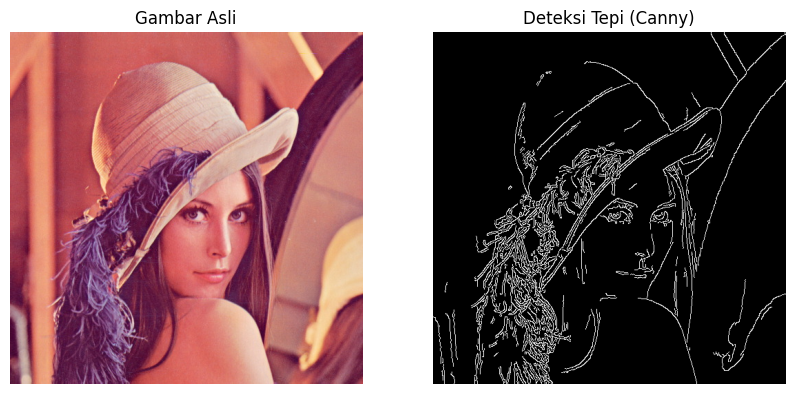

In [2]:
# Ubah gambar ke grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Terapkan algoritma deteksi tepi Canny
edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)

# Tampilkan gambar aslinya dan gambar hasil deteksi tepi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Deteksi Tepi (Canny)')
plt.axis('off')

plt.show()

# **Deteksi Wajah**

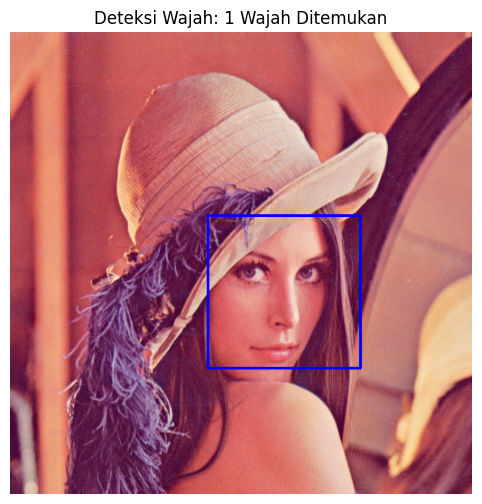

In [3]:
# URL model Haar Cascade untuk wajah depan
face_cascade_url = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'
urllib.request.urlretrieve(face_cascade_url, 'haarcascade_frontalface_default.xml')

# Muat modelnya
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Konversi gambar ke grayscale (Haar Cascade bekerja pada grayscale)
gray_image_faces = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Deteksi wajah pada gambar
faces = face_cascade.detectMultiScale(gray_image_faces, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Gambar kotak pembatas di sekitar setiap wajah yang terdeteksi
image_with_faces = image.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(image_with_faces, (x, y), (x + w, y + h), (255, 0, 0), 2) # Gambar kotak biru

# Tampilkan hasil
image_with_faces_rgb = cv2.cvtColor(image_with_faces, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 6))
plt.imshow(image_with_faces_rgb)
plt.title(f'Deteksi Wajah: {len(faces)} Wajah Ditemukan')
plt.axis('off')
plt.show()

# Mendeteksi Mobil

In [1]:
# Instal Ultralytics (yang berisi YOLOv8) dan OpenCV
!pip install ultralytics opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.9 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO

# Muat model YOLOv8n
model = YOLO('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Unggah gambar dari komputer Anda.


Saving 20dparkir-slo-H72-3249157966.webp to 20dparkir-slo-H72-3249157966.webp

image 1/1 /content/20dparkir-slo-H72-3249157966.webp: 448x640 6 persons, 2 cars, 2 trucks, 2 umbrellas, 174.1ms
Speed: 4.3ms preprocess, 174.1ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


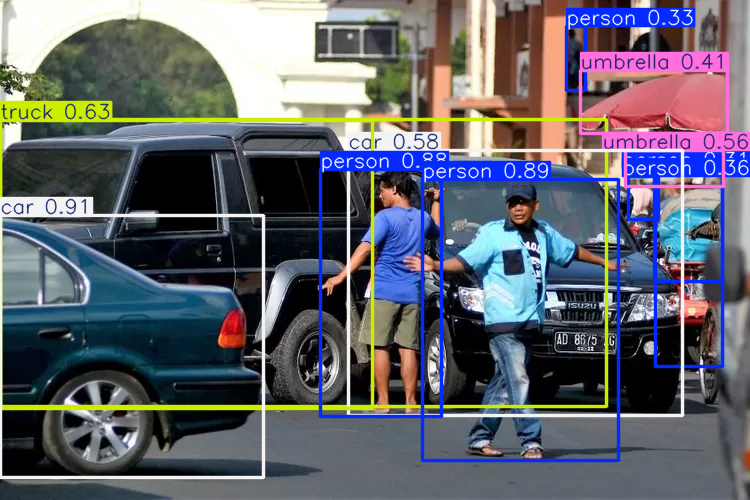


Total mobil, truk, dan bus yang terdeteksi: 4


In [6]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
from google.colab import files
import numpy as np

# Muat model YOLOv8n
model = YOLO('yolov8n.pt')

# Unggah file gambar dari komputer
print("Unggah gambar dari komputer Anda.")
uploaded = files.upload()

# Ambil nama file yang diunggah
file_name = next(iter(uploaded))

# Lakukan prediksi pada gambar yang diunggah
results = model(file_name)

# Ambil objek hasil prediksi
result = results[0]

# Dapatkan nama-nama kelas yang dideteksi
class_names = result.names

# Dapatkan kotak pembatas, kelas, dan kepercayaan
boxes = result.boxes
classes = boxes.cls
confidences = boxes.conf

# Hitung jumlah mobil, bus, dan truk yang terdeteksi
car_count = 0
for cls in classes:
    class_name = class_names[int(cls)]
    if class_name in ['car', 'truck', 'bus']:
        car_count += 1

# Tampilkan gambar dengan kotak deteksi
img_with_boxes = result.plot()

# Tampilkan gambar menggunakan cv2_imshow
cv2_imshow(img_with_boxes)

print(f"\nTotal mobil, truk, dan bus yang terdeteksi: {car_count}")

# New section Training dan Validate Sendiri

In [7]:
!pip install tensorflow matplotlib numpy

In [24]:
import zipfile
import os
from google.colab import files

# Upload file zip berisi dataset
uploaded = files.upload()
file_name = next(iter(uploaded))

# Ekstrak dataset
zip_ref = zipfile.ZipFile(file_name, 'r')
zip_ref.extractall('dataset_jari')
zip_ref.close()

# Membuat daftar nama kelas berdasarkan nama folder
class_names = sorted(os.listdir('dataset_jari'))
print("Nama kelas:", class_names)

Saving dataset_jari.zip to dataset_jari.zip
Nama kelas: ['1_jari', '2_jari', '3_jari', '4_jari', '5_jari']


In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np

# Definisi ukuran gambar dan batch size
image_size = (150, 150)
batch_size = 32

# Membuat dataset pelatihan
train_ds = image_dataset_from_directory(
    'dataset_jari',
    labels='inferred',
    label_mode='categorical', # Karena ada 5 kelas
    image_size=image_size,
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True
)

# Mendapatkan nama kelas dari dataset
class_names = train_ds.class_names
print("Label kelas:", class_names)

# Fungsi untuk melakukan normalisasi gambar ke rentang [0, 1]
def preprocess(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

# Terapkan preprocessing ke dataset
train_ds = train_ds.map(preprocess)

Found 19 files belonging to 5 classes.
Label kelas: ['1_jari', '2_jari', '3_jari', '4_jari', '5_jari']


In [26]:
from tensorflow.keras import layers, models

# Membuat model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax') # Output layer dengan jumlah kelas
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Menampilkan summary model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,997 (18.42 MB)

 Trainable params: 4,828,997 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.1579 - loss: 1.6191
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.2632 - loss: 2.0158
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4211 - loss: 1.7658
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4737 - loss: 1.5464
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2632 - loss: 1.5301
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4737 - loss: 1.4929
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7368 - loss: 1.4435
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6842 - loss: 1.3745
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8421 - loss: 1.2734
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7895 - loss: 1.1607


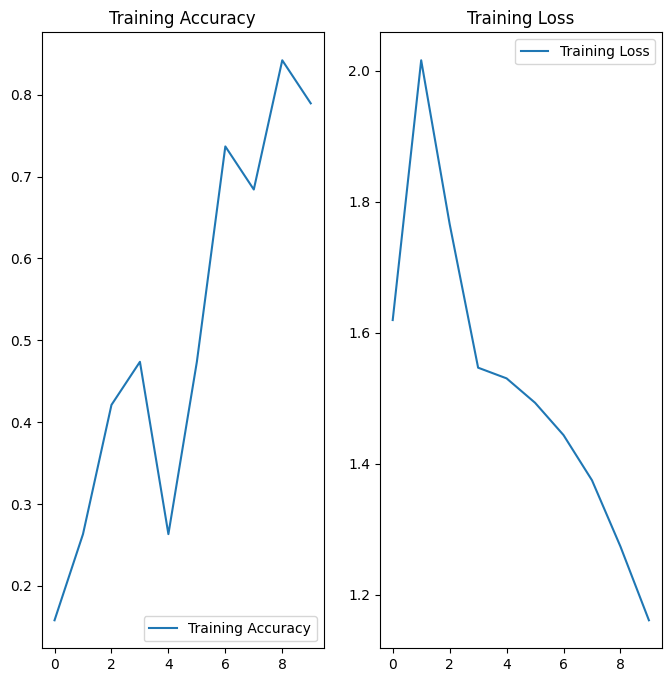

In [27]:
epochs = 10 # Jumlah epoch (iterasi pelatihan)
history = model.fit(
    train_ds,
    epochs=epochs
)

# Visualisasi hasil pelatihan (opsional)
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [31]:
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files

def predict_finger_count(img_path):
    img = image.load_img(img_path, target_size=image_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) # Membuat batch dimensi
    img_array = img_array / 255.0 # Normalisasi (sesuaikan dengan preprocessing saat training)

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class_name = class_names [predicted_class_index]
    confidence = predictions [0][predicted_class_index]

    print(f"Prediksi: {predicted_class_name} (Confidence: {confidence:.2f})")

# Upload gambar untuk diprediksi
uploaded_predict = files.upload()
if uploaded_predict:
    predict_file_name = next(iter(uploaded_predict))
    predict_finger_count(predict_file_name)

Saving 64c670dc-5f08-474d-b009-cb1666084187.jpeg to 64c670dc-5f08-474d-b009-cb1666084187.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Prediksi: 1_jari (Confidence: 0.39)
